<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/chapter1_coherence_and_interferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>



```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






**Contributors:**
+ ... <...@unizar.es>.

---
# **Óptica - Tema 1 - Coherencia e Interferencias**

---

# Coherencia

## Definición de ondas planas y pulsos gaussianos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def onda_plana(t, A, τ, ω_0, φ):
    """
    Genera una onda plana dada la frecuencia central y fase.
    Las unidades han de ser consistentes entre t, τ y ω_0.
    El pulso está normalizado.

    La onda plana se caracteriza por un término exponencial complejo que depende de la frecuencia central de la onda
    y la fase de la envolvente de la onda portadora.

    E(t) = E * exp(i * ω_0 * t) * exp(i * φ(t)) = A * exp(-t² / 2*τ) * exp(i * ( ω_0 * t + φ(t) ) )

    Argumentos:
        t (float): vector de tiempos
        A (float): amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia central (radianes / unidad de tiempo)
        φ (float): fase de la envolvente de la onda portadora (rad)

    Devuelve:
        E_pulso (float): forma del pulso gaussiano en el tiempo especificado
    """

    return A * np.exp(1j * ( ω_0 * t + φ ))

def pulso_gaussiano(t, A, τ, ω_0, φ):
    """
    Genera un pulso gaussiano dada su duración, frecuencia central y fase.
    Las unidades han de ser consistentes entre t, τ y ω_0.
    El pulso está normalizado.

    Un pulso gaussiano viene caracterizado por una envolvente en forma de gaussiana de expresión:

    E_envolvente = A * exp(-t² / 2*τ)

    Donde τ es la duración temporal del pulso, que está relacionada con el ancho de banda por la expresión:

    τ = FWHM / (2 * √log(2))

    FHWM es la anchura a media altura (full width half maximum).

    La envolvente viene modulada por un término exponencial complejo que depende de la frecuencia central de la onda,
    de manera que el pulso vendrá dado por el producto de la envolvente y esta exponencial, además del producto
    con la exponencial compleja que lleva la fase de la envolvente de la onda portadora.

    E(t) = E_envolvente * exp(i * ω_0 * t) * exp(i * φ(t)) = A * exp(-t² / 2*τ) * exp(i * ( ω_0 * t + φ(t) ) )

    Argumentos:
        t (float): vector de tiempos
        A (float): amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia central (radianes / unidad de tiempo)
        φ (float): fase de la envolvente de la onda portadora (rad)

    Devuelve:
        E_pulso (float): forma del pulso gaussiano en el tiempo especificado
    """

    return A * np.exp(-t*t / (2 * τ)) * np.exp(1j * ( ω_0 * t + φ ))

## Parámetros

In [ ]:
c=299792458.0     #m/s
pasos_temporales = 1024

# -- Parámetros del pulso --
A = 1 # Amplitud del pulso
λ_0 = 100.55 # Longitud de onda de ejemplo (en micrómetros)
ω_0 = 2 * np.pi * c * 1e-12 / (λ_0 * 1e-6) # Frecuencia angular del pulso (rad / ps)
τ = 1 # Duración del pulso (ps)
to=10*τ
t, Δt = np.linspace(0, 20, num=pasos_temporales, retstep=True) # Vector de tiempos (centrado en cero, ps). Guardamos la separación entre datos
print("Δt (ps)=",Δt)
fs=1/Δt
print("fs=1/Δt sampling rate (1/ps)=",fs)

# Fase
#φ_0 =  0* np.ones(pasos_temporales) # Fase (constante en este caso)
φ_0 = (t-to)**2

## Cálculo del pulso

In [ ]:
onda='gaussiana'
if(onda=='onda plana'):
  onda =onda_plana(t-to, A, τ, ω_0, φ_0)

if(onda=='gaussiana'):
  onda=pulso_gaussiano(t-to, A, τ, ω_0, φ_0) # Vector con el campo complejo del pulso


## Representación gráfica

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(t,np.real(onda),label='$Re(E(t))$')
delay=3.0
plt.plot(t+delay,np.real(onda),label=r'$Re(E(t+\tau))$',
                                color='red',linestyle='--')

plt.xlabel(r'$t$ (ps)')
plt.ylabel(r'$Re(E)$')
plt.xlim(0,20)
plt.legend()
plt.show()

# Interferencias: franjas de Young

Intensidad franjas de Young para espectro simétrico:

$$I=I_1+I_2+2\sqrt{I_1 I_2}\gamma_c(\tau_s+\tau) \cos(\delta)$$ donde $\delta=\omega_0(\tau_s+\tau)$

Siendo $$\gamma_c(\tau) = \int_{-\infty}^{+\infty}g(x)cos(2\pi \, x \, \tau)\,dx$$ donde $x=\nu -\nu_0$

## Observación en función de las coordenadas $x,y$ de la pantalla.

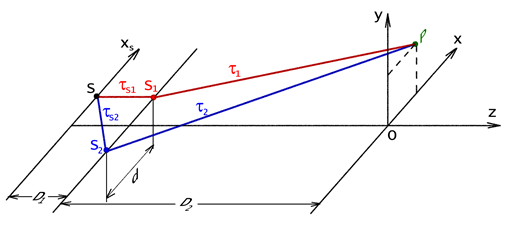

Delta se puede escribir como: $\delta=\omega_0(\tau_s+\tau)=\dfrac{2\pi \, n}{\lambda_0}(\Delta_s+\Delta)$
donde
+ $\Delta_s=\overline{SS_2}-\overline{SS_1}$
+ $\Delta_s=\overline{S_2P}-\overline{S_1P}$


Aproximaciones:
1. $x_s,d << D_1$ : fuente "casi" alineada con el eje $z$. Distancia entre aperturas pequeña en comparación con la distancia entre el plano de la fuente y el de las aperturas.
2. $x,y,d << D_2$ : puntos de observación cercanos al eje $z$. Distancia entre aperturas pequeña en comparación con la distancia entre el plano de la de las aperturas y el plano de observación.

Utilizando estas aproximaciones se llega a que
+ $\Delta_s=\dfrac{x_s d}{D_1}$
+ $\Delta_s=\dfrac{x d}{D_2}$

---
*En el código $(x,y)=(x_p,y_p)$*

## Ejemplo $g(\nu)\rightarrow$ Tipo "perfil cuadrado" (simétrico)

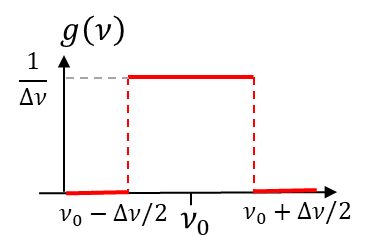

$\gamma(\tau)=e^{\imath 2 \pi \nu_0 \tau} \dfrac{\sin{(\pi \Delta \nu \, \tau)}}{\pi \Delta \nu \, \tau}$

$\implies \gamma_c(\tau)=\dfrac{\sin{(\pi \Delta \nu \, \tau)}}{\pi \Delta \nu \, \tau}$

## Función de Python para calcular la intensidad de las franjas de Young (aproximación)

In [ ]:
import numpy as np

def intensidad_young(xp,I1,I2,lambda_nm,n,d,D1,D2,xs,gamma_tipo='onda plana'):
  # Longitud de onda, k y frecuencia angular
  c=299792458.0     #m/s
  lambda0=lambda_nm*1e-9
  k = 2.0 * np.pi / lambda0
  omega0=c*k

  # Cálculo de delta
  delta= (2.0*np.pi*n/lambda0)*(xs*d/D1+xp*d/D2)

  # Se selecciona el tipo de onda (gamma_c)
  # Por defecto 'onda plana'
  # Se pueden añadir tantas como se quiera
  if(gamma_tipo=='onda plana'):
    gamma_c=1.0

  if(gamma_tipo=='perfil cuadrado'):
    tau=delta/omega0
    delta_lambda=10.0 #nm # delta_lambda=0.0 --> onda plana
    lambda_i=lambda0-delta_lambda*1e-9
    lambda_f=lambda0+delta_lambda*1e-9
    delta_nu =c*(lambda_i-lambda_f)/(lambda_f*lambda_i)

    #delta_nu=1.0e-1*omega0/(2.0*np.pi)
    gamma_c= np.sinc(np.pi*delta_nu*tau)

  # Cálculo de la intensidad
  return I1+I2+2.0*np.sqrt(I1*I2)*gamma_c*np.cos(delta)

# Parámetros geométricos

+ $D_1$   (distancia entre el plano de la fuente en $S$ y el plano que contiene a las aperturas)
+ $D_2$  (distancia entre el plano que contiene a las aperturas y la "pantalla" de observación)
+ $d$  (distancia entre las aperturas)
+ $x_s$  (coordenada de la fuente en el eje $x$ )
+ $\lambda$ (longitud de onda)
+ $n$ (índice de refracción del medio)

In [ ]:
# Intensidades
I1,I2=1.0,1.0 # Unidades arbitrarias

# Índice de refracción
n=1.0

# Distancias
D1=1.0  # m
D2=1.0  # m
d=0.001 # m
xs=0.0 # m

# Parámetros electromagnéticos
c=299792458.0     #m/s
lambda_nm = 600.0 # nm
lambda0=lambda_nm*1e-9
k = 2.0 * np.pi / lambda0
omega0=c*k

print("Frecuencia central=",np.round(omega0*1e-12/(2.0*np.pi),2),"THz")

# gamma_c
gamma_tipo='perfil cuadrado'

# Experimento de Young en la dirección $x$ ($y=0$)

## Cálculo de la intensidad

In [ ]:
def calc_intensity_pattern():
    Xp=400
    m=10
    xpm = (2*m+1)*lambda0*D2/(2.0*d)-xs*D2/D1
    diff_pattern = []
    for i in range(Xp):
      print("x iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp
      I_analytic=intensidad_young(xp,I1,I2,lambda_nm,n,d,D1,D2,xs,
                                  gamma_tipo=gamma_tipo)
      diff_pattern.append([xp,I_analytic])
    return np.array(diff_pattern)

# Calculo de la intensidad
intensity_pattern=calc_intensity_pattern()

## Figura estática

In [ ]:
import matplotlib.pyplot as plt
x=intensity_pattern[:,0]
y_analytic=intensity_pattern[:,1]
plt.plot(x,y_analytic,label='Analytic')

plt.xlabel(r'$x$ (m)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Experimento de Young plano $XY$

## Cálculo de la intensidad

In [ ]:
def calc_intensity_pattern_2D():
    Xp,Yp=400,400
    m=10
    xpm = (2*m+1)*lambda0*D2/(2.0*d)-xs*D2/D1
    ypm = xpm
    diff_pattern = []
    for i in range(Xp):
      print("x iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp
      for j in range(Yp):
        yp=ypm * (Yp - 2 * j) / Yp
        I_analytic=intensidad_young(xp,I1,I2,lambda_nm,n,d,D1,D2,xs,
                                  gamma_tipo=gamma_tipo)
        diff_pattern.append([xp,yp,I_analytic])
    return np.array(diff_pattern)

intensity_pattern_2D=calc_intensity_pattern_2D()

## Figura estática

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your numpy array)
data =intensity_pattern_2D

# Extract x, y, and the value from the data
x = data[:, 0]
y = data[:, 1]
value = data[:, 2]

# Reshape the value to a 2D grid for contour plotting
x_unique = np.unique(x)
y_unique = np.unique(y)
X, Y = np.meshgrid(x_unique, y_unique)
Z = value.reshape(len(y_unique), len(x_unique))


# Create a contour plot
plt.figure(figsize=(12, 2))
max_value=np.max(Z)/1.0
contour = plt.contourf(X, Y,  np.rot90(Z), levels=500, cmap='viridis',
                       vmax=max_value)
plt.colorbar(contour)  # Use scientific notation for colorbar


plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Intensity')
plt.show()


## Figura dinámica

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import SelectionSlider

def plot_function_with_sliders(f, labels, x_min, y_min,ref_x,max_y,value_scale):
    # Extract the parameter names from the function signature, excluding 'x'
    # and the last
    parameters = list(f.__code__.co_varnames)[1:f.__code__.co_argcount-1]

    # Create sliders for each parameter
    # Define the base, min exponent, and max exponent for the slider
    sliders = {}
    i=0
    for param in parameters:
        #print("parameter=",param)
        #print("[initial value, min, max, step]=",value_scale[i])
        sliders[param] = widgets.FloatSlider(value=value_scale[i][0],
                                             min=value_scale[i][1],
                                             max=value_scale[i][2],
                                             step=value_scale[i][3],
                                             description=param,
                                             readout_format='.4f')
        i+=1
    # Create sliders for x_max and y_max
    #print("x max")
    #print("[initial value, min, max, step]=",value_scale[i])
    x_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='x scale',
                                       readout_format='.4f')
    i+=1
    #print("y max")
    #print("[initial value, min, max, step]=",value_scale[i])
    y_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='y scale',
                                       readout_format='.4f')

    # Define a function to update the plot
    def update_plot(**kwargs):
        N=200
        # Extract x, y, and the value from the data
        x = np.linspace(x_min-x_max_slider.value, abs(x_min)+x_max_slider.value, N)
        y = np.linspace(y_min-y_max_slider.value, abs(y_min)+y_max_slider.value, N)

        # Pass slider values as keyword arguments to the input function
        params = {param: slider.value for param, slider in sliders.items()}
        params['gamma_tipo'] = value_scale[-1][0]

        # Cálculo de la función
        Z =f(x, **params)

        # Reshape the value to a 2D grid for contour plotting
        x_unique = np.unique(x)
        y_unique = np.unique(y)
        X, Y = np.meshgrid(x_unique, y_unique)

        # Repeat the row N times to create a (N,N) array
        Z = np.tile(Z, (N, 1))

        # Result as a (N, N) array
        Z = Z.T  # Transpose the array
        Z = Z.reshape(len(y_unique), len(x_unique))

        # Create a contour plot
        plt.figure(figsize=(12, 2))
        max_value=np.max(Z)
        print("Valor mínimo=",np.min(Z))
        print("Valor máximo=",max_value)
        contour = plt.contourf(X, Y,  np.rot90(Z), levels=50, cmap='viridis')

        # Set the minimum and maximum values for the colorbar
        contour.set_clim(0.0,max_value)  # Set the desired min and max values here

        plt.colorbar(contour)

        plt.xlim((x_min-x_max_slider.value)/ref_x, (abs(x_min)+x_max_slider.value)/ref_x)
        plt.ylim((y_min-y_max_slider.value)/ref_x, (abs(y_min)+y_max_slider.value)/ref_x)
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title('Intensity')
        plt.show()

    # Create an interactive plot with the sliders
    interactive_plot = interactive(update_plot, **sliders, x_max=x_max_slider, y_max=y_max_slider)
    return interactive_plot

In [ ]:
# Example of an input function
function=intensidad_young


# Define labels, axis limits, and initial parameter values
labels = [r'$x(m)$', r'$y(m)$']
m=10
xpm = (2*m+1)*lambda0*D2/(2.0*d)-xs*D2/D1
x_min = -xpm
y_min = -xpm
max_y = 1.0
ref_x = 1.0 #lambda0*D2/d
# value_scale (each): [initial value, min,max,step]
value_scale=[[I1,1e-4*I1,10*I1,0.01*I1], # I1
             [I2,1e-4*I2,10*I2,0.01*I2], # I2
             [lambda_nm,0.1*lambda_nm,3.0*lambda_nm,0.1*lambda_nm],      # lambda (wavelength) in nm
             [n,1.0,3.5,0.1],           # n
             [d,0.1*d,10*d,0.05*d],     # d
             [D1,0.1*D1,10*D1,0.05*D1], # D1
             [D2,0.1*D2,10*D2,0.05*D2], # D2
             [xs,0.0,1e-2,1e-3],        # xs
             [-xpm,0.1*xpm,10*xpm,0.05*xpm],    # x scale
             [-xpm,0.1*xpm,10*xpm,0.05*xpm],    # y scale
             [gamma_tipo]]       # tipo gamma

# Create the interactive plot
interactive_plot = plot_function_with_sliders(function,
                                              labels,
                                              x_min, y_min,
                                              ref_x,max_y,
                                              value_scale)

# Display the interactive plot
interactive_plot